__Warmup__

Use Newton's method to estimate a root of cos x. Initial guess is 2.

Newton's method equation is:
$$x_{i+1}=x_i - \frac{f(x_i)}{f'(x_i)}$$

Relative error equation is
$$\left|\epsilon_a\right|=\left|\frac{x_{i+1}-x_i}{x_{i+1}}\right|\times 100$$

* Set the max number of iterations  for the method at 20
* Set a minimum denominator of `1E-20`
* Set a  tolerance of `5E-8` for the relative approximate error

[Click here for Video link](https://youtu.be/n3SnbAtVYR4). Note ERRORS in video:

 - Newton's formula is:  x_{i+1} = x_i  MINUS f(x_i)/f'(x_i).  The code is right, the description is wrong.
 - The approximate relative error should be in percent, so the formula in line 47 should be:
approxRelError[i+1]=abs(approxError[i+1]/xiPlus1)*100

Root at: 1.5707963267948966 with tolerance 5e-08


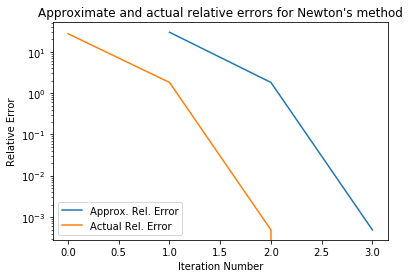

In [4]:
### Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Initialization
#Function to be used
def fn(x):
    return np.cos(x)

#derivative of function
def fnPrime(x):
    return -np.sin(x)

#Initial guess for root
x0 = 2

#Actual root
ActualRoot = np.pi/2

#Maximum number of iterations that you would like to use
maxIter = 20

#minDivisor allows us to not divide by too small a number, if so we need to break
minDivisor = 1E-20

#Tolerance level can be set for desired significant digits
#If approximate relative error (in percent) is less than tolerance, break
tolerance = 5E-8


#Array to store data for each iteration (to plot at the end)

approxError = np.zeros(maxIter)
approxRelError = np.zeros(maxIter)
actualError = np.zeros(maxIter)
actualRelError = np.zeros(maxIter)



##Calculation
#Set initial x as first value in iteration
xi = x0


#Loop: iterate to max number
for i in range(maxIter):
    #Calculate actual and relative errors
    iter_cutoff = i
    actualError[i] = abs(ActualRoot - xi)
    actualRelError[i] = abs(actualError[i]/ActualRoot)*100
    
    #Ensure denominator is not too small -- causes convergence problems
    fprime = fnPrime(xi)
    if abs(fprime) < minDivisor:
        print("Deriv. is too smaall: root probably has multiplicity > 1")
        break
    
    #update root estimate
    xiPlus1 = xi - (fn(xi)/fprime)
    
    
    #Calculate approximate error and relative error
    approxError[i+1] = abs(xiPlus1 - xi)
    approxRelError[i+1] = abs(approxError[i+1]/xiPlus1)*100 #xiPlus1
    #If close enough then stop
    if approxRelError[i+1] <= tolerance:
        break
    
    #Update xi
    xi = xiPlus1
    
    
##Presentation
#Print root
print("Root at:", xi, "with tolerance", tolerance)

#Create figure for approximate and actual relative error
plt.figure(1)
plt.plot(np.arange(1, iter_cutoff+1), approxRelError[1: iter_cutoff+1], label = "Approx. Rel. Error")
plt.plot(np.arange(iter_cutoff+1), actualRelError[ : iter_cutoff+1], label = "Actual Rel. Error")

#Annotate the plot:

#change y scale to logarithmic
plt.yscale('log')

#Add labels to axes
plt.xlabel('Iteration Number')
plt.ylabel('Relative Error')


#Add legend and title then show
plt.title("Approximate and actual relative errors for Newton's method")
plt.legend(loc = 3)
plt.show()





1.a.	(Answer this part on a sheet of paper – scan and submit the scan as an attachment on Canvas.)  Use your code to estimate a root of $f(x) =x^3 - x$, starting with the initial guess $x_0=\frac{1}{\sqrt{5}}$.  What happens? Create a diagram (you can do on paper, or write a code) similar to this [figure](http://fourier.eng.hmc.edu/e176/lectures/figures/NewtonRaphson.png) to explain what’s happening. (You may start with $n=0$, and go up to $n=3$.)  

1.b. What happens to Newton’s method when the initial guess is slightly smaller than $\frac{1}{\sqrt{5}}$? Show the resulting $x_0,  x_{1} , x_{2}m x_3$ on your diagram from 1a.) 

1.c. When the initial guess is larger than $\frac{1}{\sqrt{5}}$, does the process always converge to the same value? Try a few different values, and show $x_0, x_{1} , x_{2}, x_3$ for two different cases. (I recommend you use different colors for the different $x_0$’s).   

1.d. What do these results tell you in general about the choice of initial guesses for Newton’s method? 


In [ ]:
##See attachment for #1 responses

2.a. The Newton's method formula $x_{i+1}=x_i - \frac{f(x_i)}{f'(x_i)}$ can be written in the form:
$x_{i+1} = g(x_i).$
Write the function $g(x)$ in terms of $f(x)$ and express its derivative $g'(x)$ and second derivative $g''(x)$ in terms of the derivatives of $f(x)$.

2.b. Suppose that $r$ is a root of the function $f(x)$, so that $f(r)$ = 0.   Recall that the Taylor series expansion for $f(x)$ with expansion point $r$ has the form: $g(x) = g(r) + c_1(x-r) + c_2 (x-r)^2 + O((x-r)^3)$, where the '$O$' term  means that the approximation error when using the first 3 terms of this series is roughly proportional to $(x-r)^3$.   Find the coefficients $c_1$ and $c_2$ in terms of $f'(r)$ and $f''(r)$. 

2.c. Given $f$ and $r$ as in (3), and let $f'(r) = a$ and $f''(r)=b$. Suppose also that $|x_i - r | < \frac{|a|}{|b|}$.  Show that $|g(x_i) - r| < \frac{1}{2}|x_i - r | + O((x_i-r)^3)$.    

2.d. Assuming that the $O((x_i-r)^3)$ term in the previous inequality is negligible, show that if the function $f$ and point $x_i$ satisfy the conditions in (3) and (4) above then the sequence $x_i, x_{i+1}, x_{i+2}, ...$ converges to the root $r$. 

2.e. Given $f,r,x_i$ as in (3,4,5) Let $\epsilon_j$ be the absolute true error for $x_j$, i.e. $\epsilon_j = |x_j-r|$. Assuming that the $O((x-r)^3)$ term is very small, show that $\epsilon_{j+1} \approx k\epsilon_{j}^2$ for some constant $k$, and find the value of $k$. (The '$\approx$' symbol means "approximately equal to")

2.f. Explain why the error curves produced by the code in the video are NOT straight lines.



In [ ]:
##See attachment for #2 responses